In [1]:
import analysis.wdt as wdt
import analysis.plot_tools as fom_plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


In [10]:
base_dir = '~/repos/_wdt/wdt_data/'
t_wdt = np.linspace(0.1, 1, 10)

base = base_dir + 'pwr/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
print dirs
params = [{'st': 0.1, 'twdt': val} for val in t_wdt]
pwr_runs = wdt.MultiRun(dirs, params)

['~/repos/_wdt/wdt_data/pwr/S0100/W0100', '~/repos/_wdt/wdt_data/pwr/S0100/W0200', '~/repos/_wdt/wdt_data/pwr/S0100/W0300', '~/repos/_wdt/wdt_data/pwr/S0100/W0400', '~/repos/_wdt/wdt_data/pwr/S0100/W0500', '~/repos/_wdt/wdt_data/pwr/S0100/W0600', '~/repos/_wdt/wdt_data/pwr/S0100/W0700', '~/repos/_wdt/wdt_data/pwr/S0100/W0800', '~/repos/_wdt/wdt_data/pwr/S0100/W0900', '~/repos/_wdt/wdt_data/pwr/S0100/W1000']
Uploaded 1450 files.
Uploaded 630 files.
Uploaded 630 files.
Uploaded 582 files.
Uploaded 937 files.
Uploaded 911 files.
Uploaded 1058 files.
Uploaded 1410 files.
Uploaded 1002 files.
Uploaded 403 files.


In [21]:
reload(fom_plot)
plot = fom_plot.Plotter()

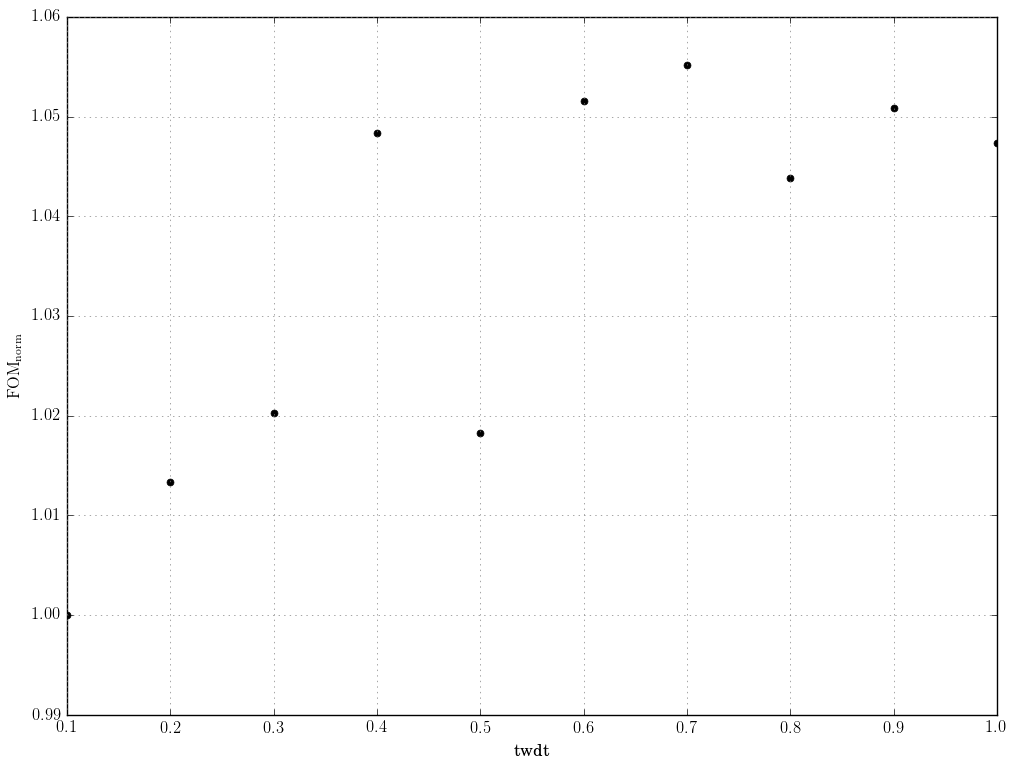

In [24]:
plot.multi_ratio(pwr_runs, 'twdt', 0.1, label='INF_FLX', grp=1, corr=False)

In [19]:
print(pwr_runs.runs[0])
pwr_runs.

1450 .m files uploaded from: /home/josh/repos/_wdt/wdt_data/pwr/S0100/W0100
Parameters:
	twdt:	0.1
	st:	0.1


In [78]:
t_wdt = [0.2]

base = data_dir + 'pwr/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
pwr_run = wdt.SerpentRun(dirs[0],params={'twdt':0.2})

Uploaded 630 files.


In [23]:
pwr_run.cyc_cpu

1.0

((630,), (630,))


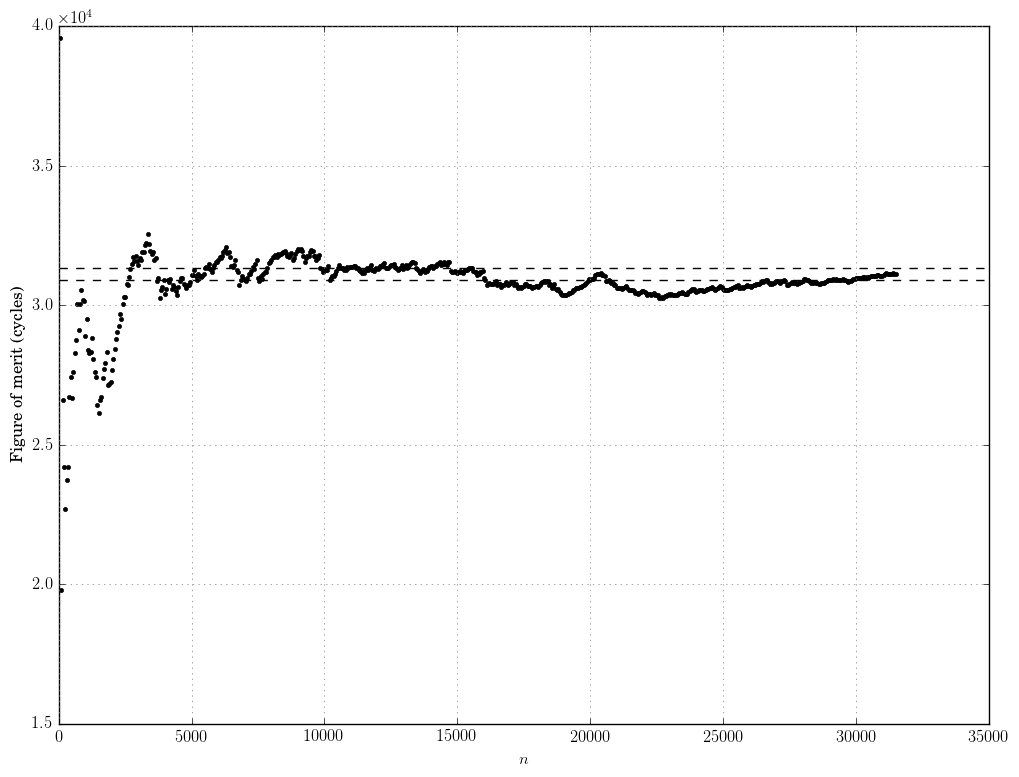

In [93]:
reload(fom_plot)
myplot = fom_plot.Plotter()
myplot.plot_fom_corr(pwr_run, label='INF_FLX', grp=1)

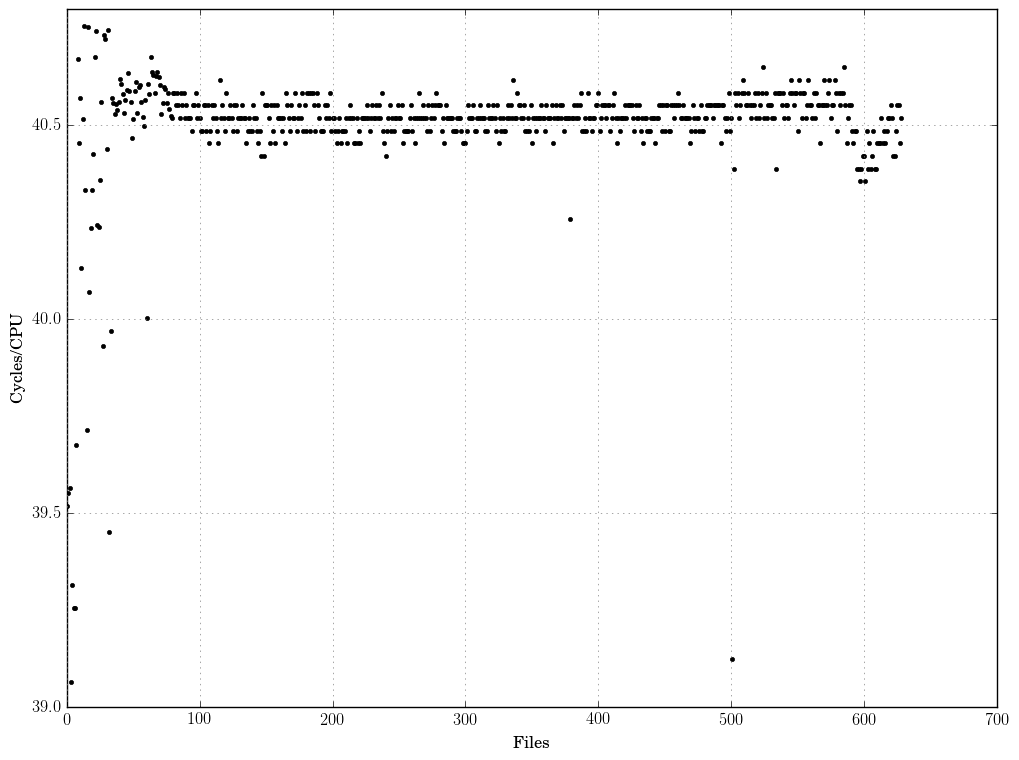

In [59]:
reload(fom_plot)
myplot = fom_plot.Plotter()
myplot.plot_cyc_v_cpu(pwr_run)

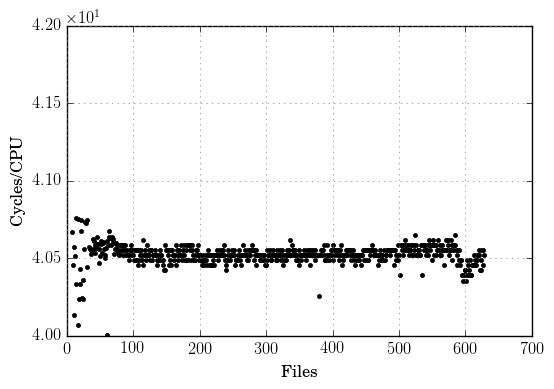

In [34]:
cycvcpu = pwr_comp.cyc_v_cpu()
plt.plot(cycvcpu,'.k')
fom_plot.fom_plot_setup(12,12)
plt.ylim([40,42])
plt.ylabel('Cycles/CPU')
plt.xlabel('Files')
plt.show()
pwr_comp.cyc_cpu = np.average(cycvcpu[100:])

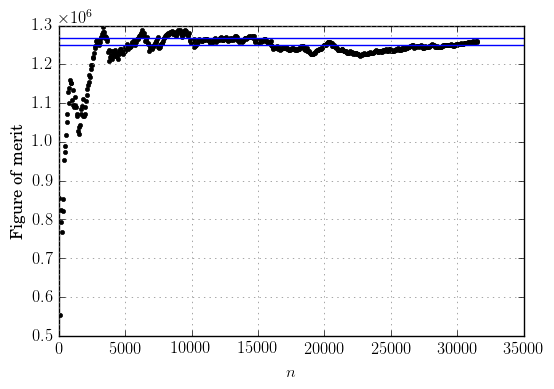

In [46]:
x = pwr_comp.cycles
y = pwr_comp.fom('INF_FLX',1)
y_err = pwr_comp.fom_std('INF_FLX',1)
y_corr = pwr_comp.fom_corr('INF_FLX',1)
#plt.plot(x,y,'.k', x, y_corr, '.r')
plt.plot(x,y,'.k')
plt.axhline(y=y[-1]-y_err)
plt.axhline(y=y[-1]+y_err)
fom_plot.fom_plot_setup(12,12)
plt.show()

In [47]:
import analysis.plot_tools as fom_plot

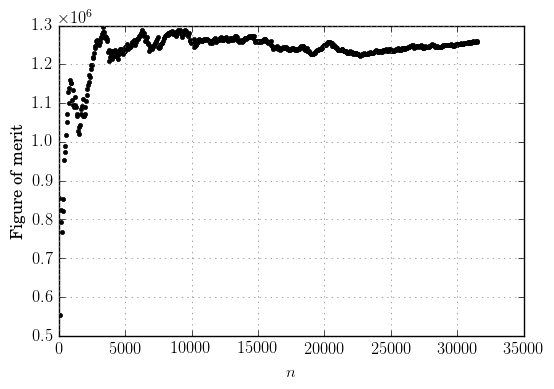

In [68]:
reload(fom_plot)
myplot = fom_plot.Plotter()
myplot.plot_fom(pwr_comp, label='INF_FLX', grp=1)

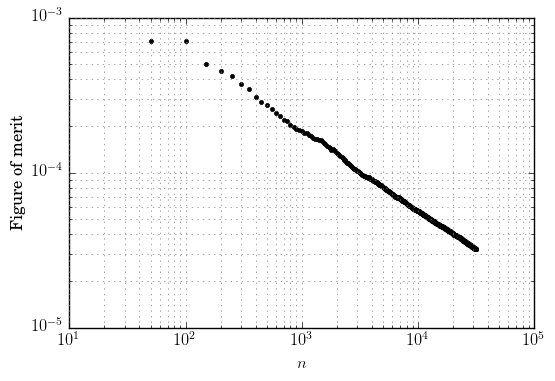

In [42]:
err = pwr_comp.get_error('INF_FLX',1)
plt.plot(x,err,'.k')
fom_plot.fom_plot_setup(12,12)
plt.yscale('log')
plt.xscale('log')
plt.show()

# MultiRuns

In [133]:
reload(wdt)
t_wdt = [0.1, 0.2, 0.3, 0.4]

base = data_dir + 'pwr/S0100/'
dirs = [base + 'W' + str('{:0>4d}'.format(int(n*1000))) for n in t_wdt]
params = [{'twdt':val} for val in t_wdt]
pwr_run = wdt.MultiRun(dirs,params)

Uploaded 1450 files.
Uploaded 630 files.
Uploaded 630 files.
Uploaded 582 files.


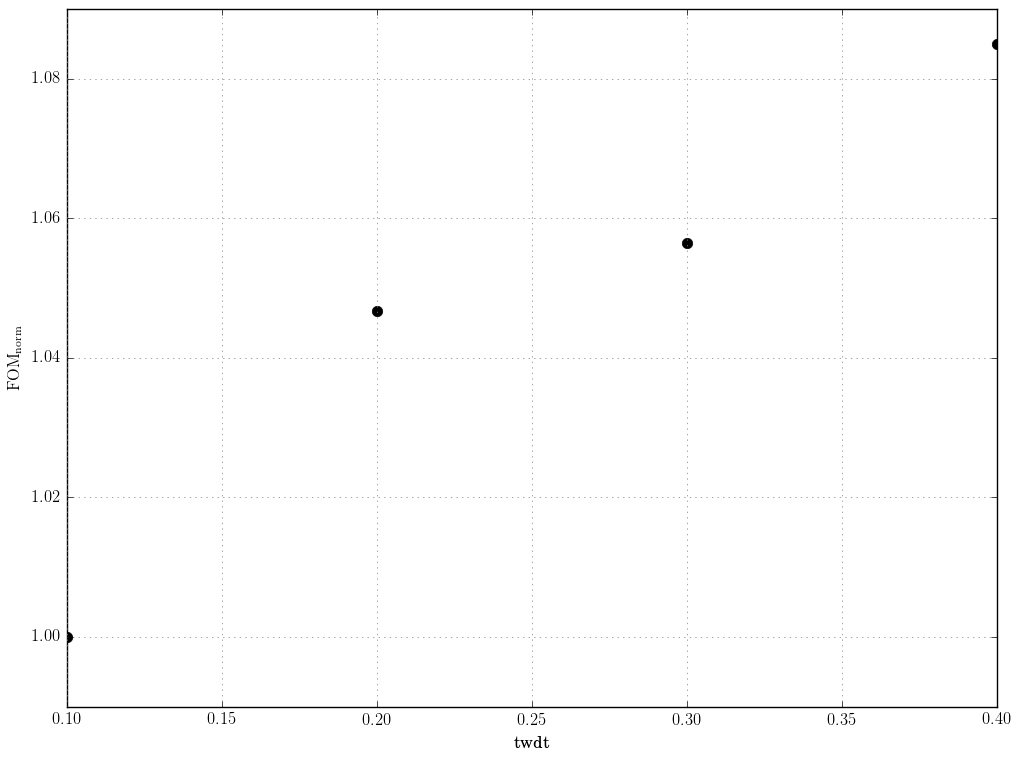

In [138]:
reload(fom_plot)
myplot = fom_plot.Plotter()
myplot.multi_ratio_corr(pwr_run, 'twdt', 0.1, label = 'INF_FLX', grp = 1)

In [105]:
for run in pwr_run.runs:
    print(run)

630 .m files uploaded from: /home/josh/repos/_wdt/wdt_data/pwr/S0100/W0200
Parameters:
	t:	w
630 .m files uploaded from: /home/josh/repos/_wdt/wdt_data/pwr/S0100/W0300
Parameters:
	t:	w


In [112]:
print(pwr_run.runs[0])

630 .m files uploaded from: /home/josh/repos/_wdt/wdt_data/pwr/S0100/W0200
Parameters:
	t:	w


In [114]:
pwr_run.runs[0].params

{'twdt': 0.2}